10000
(10000,)
10000
(10000,)
10000


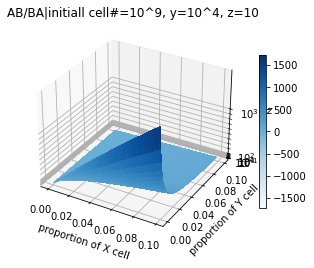

In [138]:
import numpy as np 
import matplotlib as mpl
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$y$", fontsize=10)
    ax.set_zlabel("$z$", fontsize=10)

initial_N = 10**9
t_end = 1000
tana = 307
tanb = 567

aA = -0.17
bA = 0.045
cA = -0.13
fA = 0.022
gA = 0.0000001 # W-X
hA = 0.0000001 # W-Y
kA = 0.0000001 # W-Z
pA = 0.0000001 # X-Z
qA = 0.0000001 # Y-Z
paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA )
aB = -0.32
bB = -0.15
cB = 0.024
fB = 0.022
gB = 0.0000001 # W-X
hB = 0.0000001 # W-Y
kB = 0.0000001 # W-Z
pB = 0.0000001 # X-Z
qB = 0.0000001 # Y-Z
paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB )

finalnumbera = list()
finalnumberb = list()
zratio = list()
xprop = list()
yprop = list()

for x in np.arange(10, 100000000, 1000000):
    for y in np.arange(10, 100000000, 1000000):
        xprop.append(x/initial_N)
        yprop.append(y/initial_N)
        list_ta = np.arange(0, tana, 0.01)
        list_t1a = np.arange(tana, t_end, 0.01)
        list_tb = np.arange(0, tanb, 0.01)
        list_t1b = np.arange(tanb, t_end, 0.01)
        cell_inita = [initial_N - x - y - 10, x, y, 10]
        cell_initb = [initial_N - x - y - 10, x, y, 10]
        cellsa = odeint(func, cell_inita, list_ta, args = paramsA)
        ia = len(list_ta)-1
        cell1_inita = [cellsa[ia, 0], cellsa[ia, 1], cellsa[ia, 2], cellsa[ia, 3]]
        cell1a = odeint(func, cell1_inita, list_t1a, args = paramsB)
        celltotal1a = cell1a[:, 0] + cell1a[:, 1] + cell1a[:, 2] + cell1a[:, 3]
        finalnumbera.append(celltotal1a[-1])
        cellsb = odeint(func, cell_initb, list_tb, args = paramsB)
        ib = len(list_tb)-1
        cell1_initb = [cellsb[ib, 0], cellsb[ib, 1], cellsb[ib, 2], cellsb[ib, 3]]
        cell1b = odeint(func, cell1_initb, list_t1b, args = paramsA)
        celltotal1b = cell1b[:, 0] + cell1b[:, 1] + cell1b[:, 2] + cell1b[:, 3]
        finalnumberb.append(celltotal1b[-1])

zratio = [finalnumbera/finalnumberb for finalnumbera, finalnumberb in zip(finalnumbera, finalnumberb)]

X = np.array(xprop)
print(len(xprop))
print(X.shape)
Y = np.array(yprop)
print(len(yprop))
print(Y.shape)
# X, Y = np.meshgrid(X, Y)
Z = np.array(zratio, dtype=float)
print(len(zratio))

fig = plt.figure()
# ax = fig.add_subplot(111)
ax = plt.axes(projection = "3d")
norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.plot_trisurf(X, Y, Z, linewidth=1, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=ax, shrink=0.7)
# cb.set_ticks(0.5, 1, 1.5)
# cax = fig.add_axes((0.05, 0.05, 0.9, 0.08))
# fig, ax = plt.subplots()
ax.set_zscale('log')
title_and_labels(ax, "AB/BA with XY")
# ax.set_zlim(0, 2)
ax.set_xlabel('proportion of X cell')
ax.set_ylabel('proportion of Y cell') 
# ax.set_zlabel('ratio of therapy AB/BA')
ax.set_title('AB/BA|initiall cell#=10^9, y=10^4, z=10')
# ax.view_init(elev=0, azim=0)

plt.show()

(10000,)
(10000,)
(10000,)


ValueError: not enough values to unpack (expected 2, got 1)

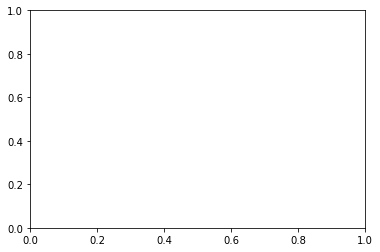

In [139]:
# X, Y = np.meshgrid(X, Y)
print(X.shape)
print(Y.shape)
print(Z.shape)
fig1, ax1 = plt.subplots()
norm1 = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p1 = ax1.pcolor(X, Y, Z, norm=norm1, cmap=mpl.cm.bwr)
ax.axis('tight')
ax1.set_xlabel(r"$xprop$", fontsize=10)
ax1.set_ylabel(r"$yprop$", fontsize=10)
ax1.xaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
ax1.yaxis.set_major_locator(mpl.ticker.MaxNLocator(3))
cb = fig1.colorbar(p1, ax=ax1)
cb.set_label(r"$AB/BA$", fontsize=10)

# cb.set_ticks([-1, -.5, 0, .5, 1])

plt.show()

<ipython-input-137-4dddfd60ba19>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)


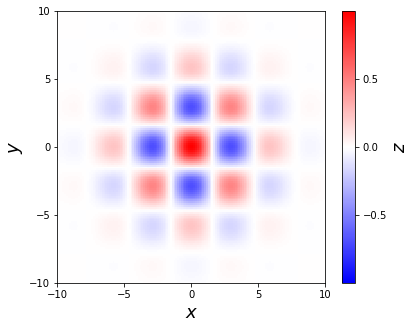

In [137]:
## 3D color test (virson from above)
# import matplotlib as mpl
# x = y = np.linspace(-10, 10, 150)
# X, Y = np.meshgrid(x, y)
# Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)
# fig, ax = plt.subplots(figsize=(6, 5))
# norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
# p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)
# ax.axis('tight')
# ax.set_xlabel(r"$x$", fontsize=18)
# ax.set_ylabel(r"$y$", fontsize=18)
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
# cb = fig.colorbar(p, ax=ax)
# cb.set_label(r"$z$", fontsize=18)
# cb.set_ticks([-1, -.5, 0, .5, 1])

# plt.show()

In [113]:
## 3D color test

# fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

# x = y = np.linspace(-3, 3, 74)
# X, Y = np.meshgrid(x, y)

# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(4 * R) / R

# norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

# p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, 
#     antialiased=False, norm=norm, cmap=mpl.cm.Blues)

# cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
# title_and_labels(axes[0], "plot_surface")

# axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
# title_and_labels(axes[1], "plot_wireframe")

# axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
# axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
# title_and_labels(axes[2], "contour")

# plt.show()